In [14]:
import errno
import pandas as pd
import glob
import re

In [57]:
path = '/Users/Janel/Downloads/BT4222/lyrics-data/*.txt'
files = glob.glob(path)
lyrics_data = {'type':[], 'lyrics':[], 'title':[]}
for name in files:
    try:
        with open(name) as f:
            st = f.read()
            st = st.replace("\n", "")
            st = (re.split('[][]',st))
            tit = name[42:-4]
            index = tit.find('_')
            tit = tit[:index].replace('-',' ')
            for i in range(0, len(st)-1):
                curr = st[i]
                if curr[0:4] == 'Vers':
                    lyrics_data['lyrics'].append(st[i+1])
                    lyrics_data['type'].append('Verse')
                    lyrics_data['title'].append(tit)
                elif curr[0:4] == 'Chor' or curr[0:4] == 'Hook':
                    lyrics_data['lyrics'].append(st[i+1])
                    lyrics_data['type'].append('Chorus')
                    lyrics_data['title'].append(tit)
                elif curr[0:4] == 'Brid':
                    lyrics_data['lyrics'].append(st[i+1])
                    lyrics_data['type'].append('Bridge')
                    lyrics_data['title'].append(tit)
                else:
                    pass
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [58]:
type(lyrics_data)

dict

In [59]:
lyrics_data

{'lyrics': ['She played the fiddle in an Irish bandBut she fell in love with an English manKissed her on the neck and then I took her by the handSaid, "Baby, I just want to dance"',
  "I met her on Grafton street right outside of the barShe shared a cigarette with me while her brother played the guitarShe asked me what does it mean, the Gaelic ink on your arm?Said it was one of my friend's songs, do you want to drink on?She took Jamie as a chaser, Jack for the funShe got Arthur on the table with Johnny riding a shotgunChatted some more, one more drink at the barThen put Van on the jukebox, got up to dance",
  'You know, she played the fiddle in an Irish bandBut she fell in love with an English manKissed her on the neck and then I took her by the handSaid, "Baby, I just want to dance"With my pretty little Galway GirlYou\'re my pretty little Galway Girl',
  'You know she beat me at darts and then she beat me at poolAnd then she kissed me like there was nobody else in the roomAs last orde

In [60]:
lyrics_df = pd.DataFrame(lyrics_data)

In [61]:
lyrics_df.head()

,lyrics,title,type
0,She played the fiddle in an Irish bandBut she ...,galway girl,Chorus
1,I met her on Grafton street right outside of t...,galway girl,Verse
2,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus
3,You know she beat me at darts and then she bea...,galway girl,Verse
4,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus


In [62]:
lyrics_df[lyrics_df['title'] == 'bad and boujee (feat. lil uzi vert)']

,lyrics,title,type
294,"Nahh, I ain't cookin' dope in a crack pot but ...",bad and boujee (feat. lil uzi vert),Verse
295,"Raindrop (drip), drop top (drop top)Smokin' on...",bad and boujee (feat. lil uzi vert),Chorus
296,Why everybody gotta hate on the kid?Smoke an a...,bad and boujee (feat. lil uzi vert),Verse
297,"Raindrop (drip), drop top (drop top)Smokin' on...",bad and boujee (feat. lil uzi vert),Chorus


In [68]:
lyrics_df['title'].unique()

array(['galway girl', 'there for you', 'perfect', 'just hold on',
       'chantaje', 'your song', 'despacito (featuring daddy yankee)',
       'rockstar', 'redbone', 'despacito   remix', 'slow hands',
       'passionfruit', 'bad things (with camila cabello)',
       'otra vez (feat. j balvin)', "there's nothing holdin' me back",
       'call on me   ryan riback extended remix', "don't let me down",
       'one dance', 'believer', 'dna.', 'malibu', 'felices los 4',
       "say you won't let go", 'humble.', 'congratulations', 'thunder',
       'reggaetón lento (bailemos)', "you don't know me   radio edit",
       'weak', 'body like a back road', 'xo tour llif3', 'attention',
       '2u (feat. justin bieber)', 'cold (feat. future)', 'paris',
       '1 800 273 8255', 'starving', 'mi gente', 'goosebumps',
       'symphony (feat. zara larsson)', 'unforgettable',
       'stay (with alessia cara)', "it ain't me (with selena gomez)",
       'hear me now', 'bank account', 'look what you made me 

In [69]:
lyrics_df.to_csv('lyricsByParts.csv')

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [74]:
lyrics = lyrics_df['lyrics']
types = lyrics_df['type']

In [75]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lyrics, types, random_state=1)

/Users/Janel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
print(X_train.shape)
print(X_test.shape)

(377,)
(126,)


In [77]:
# use CountVectorizer to create document-term matrices from X_train and X_test
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [78]:
# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

In [79]:
# only transform X_test
X_test_dtm = vect.transform(X_test)

In [80]:
# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(377, 3737)
(126, 3737)


In [81]:
# calculate null accuracy
y_test.value_counts().head(1) / y_test.shape

Chorus    0.531746
Name: type, dtype: float64

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred_class))

In [107]:
# use the default parameters
vect = CountVectorizer()
tokenize_test(vect)

Features:  3737
Accuracy:  0.777777777778
Confusion Matrix: 
[[ 0  6  7]
 [ 0 66  1]
 [ 0 14 32]]


In [108]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
tokenize_test(vect)

Features:  3935
Accuracy:  0.777777777778
Confusion Matrix: 
[[ 1  5  7]
 [ 0 66  1]
 [ 0 15 31]]


In [109]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  14152
Accuracy:  0.793650793651
Confusion Matrix: 
[[ 1  6  6]
 [ 0 66  1]
 [ 0 13 33]]


### Removing frequent terms (stop words)

In [110]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  3541
Accuracy:  0.753968253968
Confusion Matrix: 
[[ 1  6  6]
 [ 0 67  0]
 [ 0 19 27]]


In [136]:
# ignore terms that appear in more than 10% of the documents
vect = CountVectorizer(max_df=0.1)
tokenize_test(vect)

Features:  3691
Accuracy:  0.825396825397
Confusion Matrix: 
[[ 1  5  7]
 [ 0 67  0]
 [ 1  9 36]]


In [142]:
# only keep the top 1000 most frequent terms
vect = CountVectorizer(max_features=1500)
tokenize_test(vect)

Features:  1500
Accuracy:  0.793650793651
Confusion Matrix: 
[[ 1  5  7]
 [ 2 57  8]
 [ 0  4 42]]


In [144]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)
tokenize_test(vect)

Features:  1271
Accuracy:  0.714285714286
Confusion Matrix: 
[[ 1  5  7]
 [ 5 46 16]
 [ 0  3 43]]


In [151]:
vect = CountVectorizer(ngram_range=(1,5))
tokenize_test(vect)

Features:  52876
Accuracy:  0.809523809524
Confusion Matrix: 
[[ 1  7  5]
 [ 0 67  0]
 [ 0 12 34]]


In [153]:
## combine different params together
vect = CountVectorizer(ngram_range=(1,5), max_df = 0.1)
tokenize_test(vect)

Features:  52828
Accuracy:  0.833333333333
Confusion Matrix: 
[[ 1  7  5]
 [ 0 67  0]
 [ 0  9 37]]


### TF-IDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [118]:
# use TfidfVectorizer with default parameters
vect = TfidfVectorizer()
tokenize_test(vect)

Features:  3737
Accuracy:  0.746031746032
Confusion Matrix: 
[[ 0  9  4]
 [ 0 67  0]
 [ 0 19 27]]


In [119]:
# tune TfidfVectorizer for better results
vect = TfidfVectorizer(norm=None)
tokenize_test(vect)

Features:  3737
Accuracy:  0.81746031746
Confusion Matrix: 
[[ 1  6  6]
 [ 1 65  1]
 [ 1  8 37]]


In [120]:
# make TfidfVectorizer behave like CountVectorizer
vect = TfidfVectorizer(norm=None, use_idf=False)
tokenize_test(vect)

Features:  3737
Accuracy:  0.777777777778
Confusion Matrix: 
[[ 0  6  7]
 [ 0 66  1]
 [ 0 14 32]]


In [138]:
# tune and add more
vect = TfidfVectorizer(norm=None, max_df = 0.2)
tokenize_test(vect)

Features:  3718
Accuracy:  0.833333333333
Confusion Matrix: 
[[ 1  6  6]
 [ 1 66  0]
 [ 1  7 38]]


In [132]:
# tune and add more
vect = TfidfVectorizer(norm=None, max_df = 0.2, ngram_range=(1, 4)) 
tokenize_test(vect)

Features:  39785
Accuracy:  0.849206349206
Confusion Matrix: 
[[ 2  7  4]
 [ 1 66  0]
 [ 1  6 39]]


### Feature Engineering

In [164]:
def count_words(s):
    return(len(s.split()))
def count_mean_len(s):
    if count_words(s) == 0:
        return 0
    else:
        return (len(s)/count_words(s))

In [161]:
# 1. num words
lyrics_df['num_words'] = lyrics_df.lyrics.apply(count_words)
lyrics_df.head()

,lyrics,title,type,num_words
0,She played the fiddle in an Irish bandBut she ...,galway girl,Chorus,34
1,I met her on Grafton street right outside of t...,galway girl,Verse,83
2,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus,46
3,You know she beat me at darts and then she bea...,galway girl,Verse,83
4,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus,64


In [165]:
# 2. mean length
lyrics_df['mean_len'] = lyrics_df.lyrics.apply(count_mean_len)
lyrics_df.head()

,lyrics,title,type,num_words,mean_len
0,She played the fiddle in an Irish bandBut she ...,galway girl,Chorus,34,4.882353
1,I met her on Grafton street right outside of t...,galway girl,Verse,83,5.144578
2,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus,46,5.304348
3,You know she beat me at darts and then she bea...,galway girl,Verse,83,5.132530
4,"You know, she played the fiddle in an Irish ba...",galway girl,Chorus,64,4.968750


####  Model evaluation using `train_test_split` and `cross_val_score`

In [167]:
# define X and y
feature_cols = ['num_words', 'mean_len']
X = lyrics_df[feature_cols]
y = lyrics_df.type

In [168]:
# use KNN with K=100
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [170]:
# make class predictions for the testing set
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [171]:
# check the classification accuracy of KNN's predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.50793650793650791

In [172]:
# evaluate with 5-fold cross-validation (using X instead of X_train)

#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.48728441079402057

In [173]:
# calculate the null accuracy
y_test.value_counts().head(1) / y_test.shape

Chorus    0.531746
Name: type, dtype: float64

In [174]:
# use DummyClassifier instead
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_pred_class = dumb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.53174603174603174

#### Searching for optimal tuning parameters using `GridSearchCV`

In [175]:
from sklearn.model_selection import GridSearchCV

In [183]:
# define a "parameter grid" in which the key is the parameter and the value is a list of options to try
param_grid = {}
param_grid['n_neighbors'] = [100, 200, 300, 400]
param_grid

{'n_neighbors': [100, 200, 300, 400]}

In [184]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [185]:
# run the grid search
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [186]:
# examine the scores for each parameter option
grid.grid_scores_

/Users/Janel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.48708, std: 0.05143, params: {'n_neighbors': 100},
 mean: 0.50895, std: 0.03375, params: {'n_neighbors': 200},
 mean: 0.49702, std: 0.00393, params: {'n_neighbors': 300},
 mean: 0.49702, std: 0.00393, params: {'n_neighbors': 400}]

### Some Descriptive Analysis

In [196]:
words_count = pd.DataFrame(lyrics_df.groupby(['title','type']).num_words.sum())

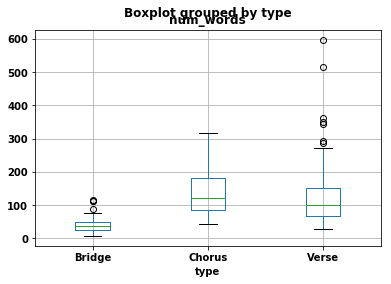

In [200]:
%matplotlib inline
words_count.boxplot('num_words', by='type')

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [203]:
def tokenize(simple_train):
    vect.fit(simple_train)
    simple_train_dtm = vect.transform(simple_train)
    return(pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names()))

In [209]:
def compile_lyrics(t):
    ls = list(lyrics_df[lyrics_df['type'] == t].lyrics)
    st = ''
    for i in ls:
        st += " "
        st += i
    return [st,]

In [213]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lyrics, types, random_state=1)

In [273]:
# store the vocabulary of X_train
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

3737

In [274]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 3.3 ms, sys: 1.27 ms, total: 4.56 ms
Wall time: 3.46 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [275]:
nb.feature_count_.shape

(3, 3737)

In [276]:
nb.class_count_

array([  34.,  183.,  160.])

In [277]:
bridge_token_count = nb.feature_count_[0, :]
chorus_token_count = nb.feature_count_[1, :]
verse_token_count = nb.feature_count_[2, :]

In [278]:
len(X_train_tokens)

3737

In [279]:
tokens = pd.DataFrame({'token':X_train_tokens, 'bridge':bridge_token_count, 'chorus':chorus_token_count, 'verse':verse_token_count}).set_index('token')

In [280]:
tokens.sample(5, random_state=6)

,bridge,chorus,verse
token,,,
mis,0.0,0.0,1.0
threw,0.0,0.0,1.0
medicine,0.0,0.0,1.0
lighters,0.0,0.0,1.0
said,0.0,4.0,6.0


In [281]:
tokens['bridge'] = tokens.bridge + 1
tokens['verse'] = tokens.verse + 1
tokens['chorus'] = tokens.chorus + 1
tokens.sample(5, random_state=6)

,bridge,chorus,verse
token,,,
mis,1.0,1.0,2.0
threw,1.0,1.0,2.0
medicine,1.0,1.0,2.0
lighters,1.0,1.0,2.0
said,1.0,5.0,7.0


In [282]:
nb.class_count_

array([  34.,  183.,  160.])

In [283]:
tokens['bridge'] = tokens.bridge / nb.class_count_[0]
tokens['verse'] = tokens.verse / nb.class_count_[1]
tokens['chorus'] = tokens.chorus / nb.class_count_[2]
tokens.sample(5, random_state=6)

,bridge,chorus,verse
token,,,
mis,0.029412,0.00625,0.010929
threw,0.029412,0.00625,0.010929
medicine,0.029412,0.00625,0.010929
lighters,0.029412,0.00625,0.010929
said,0.029412,0.03125,0.038251


In [284]:
tokens.sort_values('chorus', ascending=False)

,bridge,chorus,verse
token,,,
you,1.588235,2.57500,1.595628
the,1.117647,1.42500,2.065574
me,1.000000,1.39375,0.961749
to,0.970588,1.11875,0.808743
it,0.470588,0.98750,0.765027
my,0.970588,0.85000,0.775956
up,0.588235,0.84375,0.295082
on,0.764706,0.79375,0.693989
down,0.117647,0.71250,0.125683


In [285]:
tokens.sort_values('verse', ascending=False)

,bridge,chorus,verse
token,,,
the,1.117647,1.42500,2.065574
you,1.588235,2.57500,1.595628
me,1.000000,1.39375,0.961749
to,0.970588,1.11875,0.808743
in,0.558824,0.66250,0.803279
my,0.970588,0.85000,0.775956
it,0.470588,0.98750,0.765027
and,0.764706,0.51875,0.732240
that,0.205882,0.56250,0.715847
